In [9]:
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt

%matplotlib inline

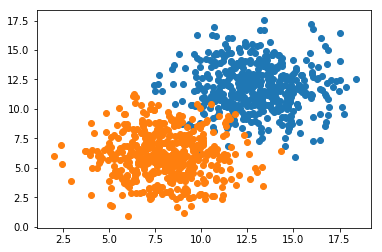

In [10]:
n_pts = 500
np.random.seed(0)

Xa = np.array([np.random.normal(13,2,n_pts),
              np.random.normal(12,2,n_pts)]).T
Xb = np.array([np.random.normal(8,2,n_pts),
              np.random.normal(6,2,n_pts)]).T

X = np.vstack((Xa,Xb))
Y = np.matrix(np.append(np.zeros(n_pts),np.ones(n_pts))).T
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])


In [14]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,),activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam,loss='binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X,y = Y, verbose =1, batch_size = 50, epochs = 200 ,shuffle = 'true')





Epoch 1/200
1000/1000 [==============================] - 0s 406us/step - loss: 0.9092 - acc: 0.5780
Epoch 2/200
1000/1000 [==============================] - 0s 28us/step - loss: 0.4075 - acc: 0.8540
Epoch 3/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.3334 - acc: 0.9010
Epoch 4/200
1000/1000 [==============================] - 0s 30us/step - loss: 0.2880 - acc: 0.9220
Epoch 5/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2412 - acc: 0.9500
Epoch 6/200
1000/1000 [==============================] - 0s 28us/step - loss: 0.2098 - acc: 0.9600
Epoch 7/200
1000/1000 [==============================] - 0s 35us/step - loss: 0.1950 - acc: 0.9590
Epoch 8/200
1000/1000 [==============================] - 0s 30us/step - loss: 0.1753 - acc: 0.9620
Epoch 9/200
1000/1000 [==============================] - 0s 29us/step - loss: 0.1717 - acc: 0.9620
Epoch 10/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.1489 - acc: 0.9760
Epoch 11

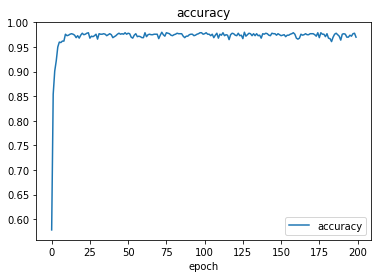

In [15]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

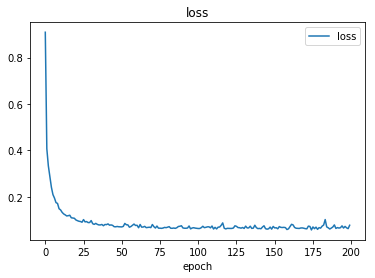

In [16]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [21]:
def plot_decision_boundary(X, Y, model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1,50)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel() # converts the array into 1D array
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

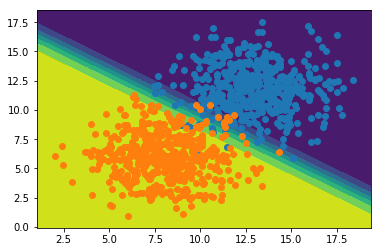

In [23]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

Prediction is: [[0.999977]]


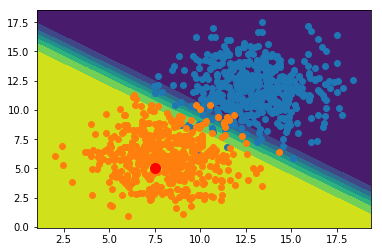

In [24]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

x,y = 7.5,5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize=10,color='r')
print('Prediction is:',prediction)